#  We are interested to findout the following
### 1. Most successful team
 ### 2. Players or factors contributing to team's win or loss
 ### 3. Suggest team or players a company should endorse for its products.

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [3]:
matchData = pd.read_csv('matches.csv')

In [4]:
deliveryData = pd.read_csv('deliveries.csv')

In [5]:
data1 = pd.DataFrame(matchData)
data2 = pd.DataFrame(deliveryData)

In [6]:
data1.shape

(756, 18)

In [7]:
data2.shape

(179078, 21)

In [8]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
data1.duplicated()
#To know the duplicated values if any so that they can be removed from first dataset.

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Length: 756, dtype: bool

In [12]:
data2.duplicated()
#To know the duplicated values if any so that they can be removed from second dataset.

0         False
1         False
2         False
3         False
4         False
          ...  
179073    False
179074    False
179075    False
179076    False
179077    False
Length: 179078, dtype: bool

In [13]:
data1.isna()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
754,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
data1.isna().sum()
# To know the total number of null values present in each column of the dataset 1

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [15]:
data2.isna()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [23]:
data2.isna().sum()
# To know the total number of null values present in each column of the dataset 2

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Handling Missing values for delivery dataset 

In [25]:
# Lets us replace the dismissal kind column of the dataset which is a missing value column with some "imputation values"
# We are trying to replace the missing values of this column because this might affect the outcome of the bowling performances of the teams
data2.isna().sum()['dismissal_kind']

170244

In [29]:
data2.isna().describe()['dismissal_kind']

count     179078
unique         2
top         True
freq      170244
Name: dismissal_kind, dtype: object

In [33]:
data2['dismissal_kind']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
179073        NaN
179074        NaN
179075    run out
179076        NaN
179077        lbw
Name: dismissal_kind, Length: 179078, dtype: object

In [45]:
data2.dismissal_kind.fillna('lbw',inplace=False)

0             lbw
1             lbw
2             lbw
3             lbw
4             lbw
           ...   
179073        lbw
179074        lbw
179075    run out
179076        lbw
179077        lbw
Name: dismissal_kind, Length: 179078, dtype: object

In [36]:
data2['dismissal_kind']

0             lbw
1             lbw
2             lbw
3             lbw
4             lbw
           ...   
179073        lbw
179074        lbw
179075    run out
179076        lbw
179077        lbw
Name: dismissal_kind, Length: 179078, dtype: object

In [37]:
data2.isna().sum()['dismissal_kind']

0

In [38]:
data2['player_dismissed']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
179073          NaN
179074          NaN
179075    SR Watson
179076          NaN
179077    SN Thakur
Name: player_dismissed, Length: 179078, dtype: object

In [46]:
data2.player_dismissed.fillna('batsman',inplace=False)

0           batsman
1           batsman
2           batsman
3           batsman
4           batsman
            ...    
179073      batsman
179074      batsman
179075    SR Watson
179076      batsman
179077    SN Thakur
Name: player_dismissed, Length: 179078, dtype: object

In [41]:
data2['player_dismissed']

0           batsman
1           batsman
2           batsman
3           batsman
4           batsman
            ...    
179073      batsman
179074      batsman
179075    SR Watson
179076      batsman
179077    SN Thakur
Name: player_dismissed, Length: 179078, dtype: object

In [79]:
data2.fielder.fillna('Jaddu',inplace=False)

0             Jaddu
1             Jaddu
2             Jaddu
3             Jaddu
4             Jaddu
            ...    
179073        Jaddu
179074        Jaddu
179075    KH Pandya
179076        Jaddu
179077        Jaddu
Name: fielder, Length: 179078, dtype: object

In [47]:
data2.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed         0
dismissal_kind           0
fielder             172630
dtype: int64

# Handling Missing values for matchData dataset 

In [48]:
data1.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [52]:
data1['winner']

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755                 Mumbai Indians
Name: winner, Length: 756, dtype: object

In [54]:
data1[data1['winner'].isnull()].index.tolist()
#Missing values are present in the following indices

[300, 545, 570, 744]

In [55]:
team1at300 = data1['team1']
team1at300[300]

'Delhi Daredevils'

In [56]:
team2at300 = data1['team2']
team2at300[300]

'Pune Warriors'

In [77]:
data1.city.fillna('Team1',inplace=False)

0          Hyderabad
1               Pune
2             Rajkot
3             Indore
4          Bangalore
           ...      
751           Mumbai
752          Chennai
753    Visakhapatnam
754    Visakhapatnam
755        Hyderabad
Name: city, Length: 756, dtype: object

In [87]:
data1.drop('umpire3',inplace=False, axis = 1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [6]:
# To know the total number of teams that are participating in the tournament
print(data1.team1.unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [7]:
total_teams = list(set(data1.team1.unique()) & set(data1.team2.unique()))

In [8]:
print(len(total_teams))

15


In [9]:
profile = ProfileReport(data1, title='Pandas Profiling Report', explorative=True)

In [28]:
profile.to_file("result.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\users\saikrishna s\anaconda3\envs\myenv\lib\site-packages\pandas\core\strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
c:\users\saikrishna s\anaconda3\envs\myenv\lib\site-packages\pandas\core\strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
c:\users\saikrishna s\anaconda3\envs\myenv\lib\site-packages\pandas\core\strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
c:\users\saikrishna s\anaconda3\envs\myenv\lib\site-packages\pandas\core\strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
c:\users\saikrishna s\anaconda3\envs\myenv\lib\site-packages\pandas\core\strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
c:\users\saikrishna s\anaconda3\envs\mye

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
# As a string
json_data = profile.to_json()

# As a file
profile.to_file("your_report.json")

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
!pip install pyqt5

In [89]:
totalMatchesPlayed = data1['id'].max()
totalMatchesPlayed

11415

In [94]:
totalSeasons = data1['season'].unique()
totalSeasons.sort()
print(totalSeasons)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


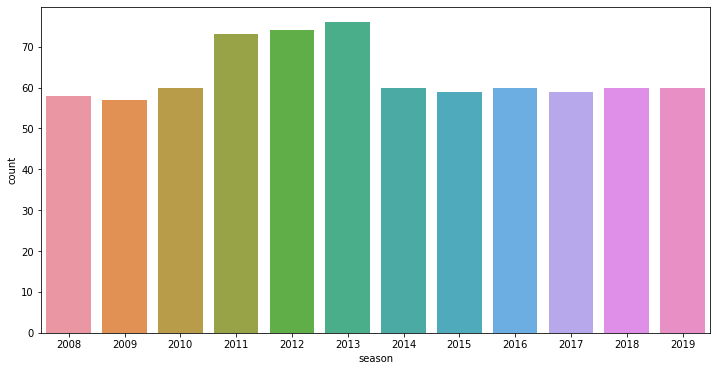

In [98]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', data=data1)
plt.show()

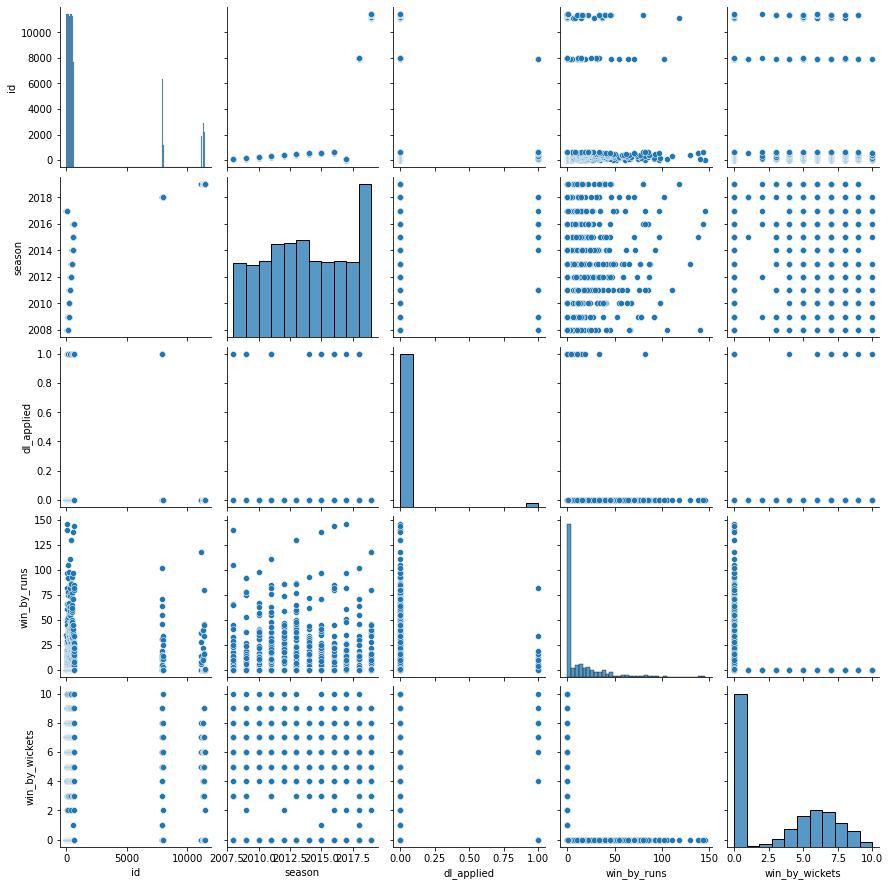

In [101]:
sns.pairplot(data1)
plt.show()

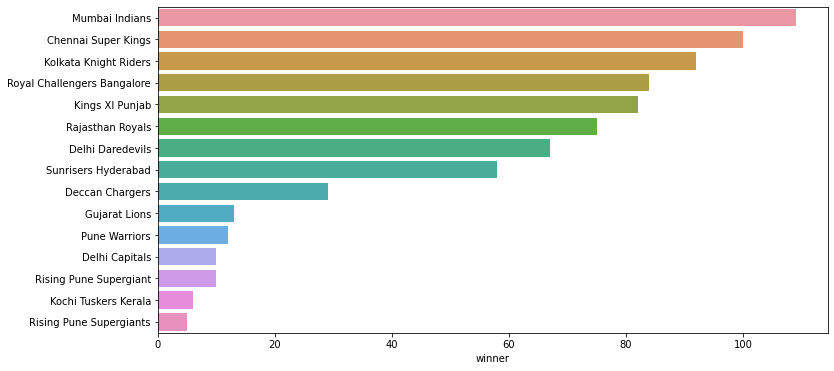

In [105]:
plt.figure(figsize=(12,6))
data = data1.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

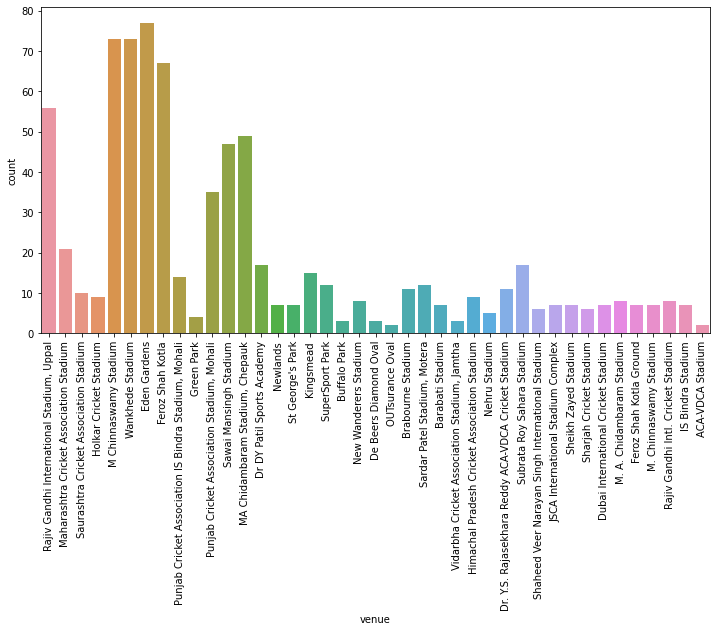

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=data1)
plt.xticks(rotation='vertical')
plt.show()

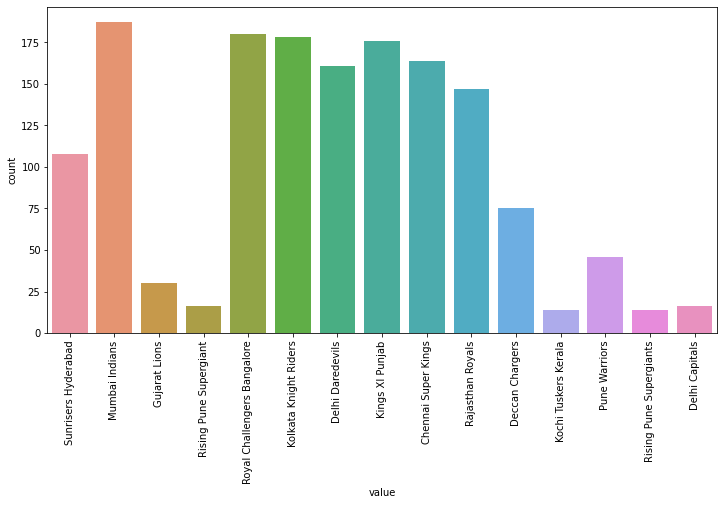

In [108]:
temp_df = pd.melt(data1, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

In [111]:
temp_df = data1.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


## Based on the graphical analysis and EDA done, Mumbai Indians and Chennai Super Kings are the most successful teams of IPL